519H0343 - Bao Hoang Qui
519H0229 - Le Hoang Khang
519H0015 - Nguyen Hao Hung

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
# Load the daraset
df = pd.read_csv('dataset.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
# Display the column names
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [5]:
# Create a copy of the dataframe of clearing
df_clean = df

In [6]:
# Drop unneccessary columns
df_clean = df_clean.drop(["Customer Type", "Gate location", "Type of Travel"], axis=1)
df_clean

,id,Gender,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,13,Eco Plus,460,3,4,3,5,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,25,Business,235,3,2,3,1,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,26,Business,1142,2,2,2,5,5,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,25,Business,562,2,5,5,2,2,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,61,Business,214,3,3,3,4,5,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,23,Eco,192,2,1,2,2,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,49,Business,2347,4,4,4,2,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,30,Business,1995,1,1,1,4,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,22,Eco,1000,1,1,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [7]:
# Drop rows with missing values
df_clean = df_clean.dropna()

In [8]:
# Display the column names after cleaning
df_clean.columns

Index(['id', 'Gender', 'Age', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'satisfaction'],
      dtype='object')

In [9]:
# Display the shape of the cleaned dataframe
df_clean.shape

(103594, 21)

In [10]:
# Convert categorical variables to numerical using factorize
df_clean["Gender"] = pd.factorize(df_clean["Gender"])[0]
df_clean["Class"] = pd.factorize(df_clean["Class"])[0]
df_clean["satisfaction"] = pd.factorize(df_clean["satisfaction"])[0]
val, label = pd.factorize(df_clean["satisfaction"])
df_clean["satisfaction"] = val

<ipython-input-10-33725f19e01b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Gender"] = pd.factorize(df_clean["Gender"])[0]
<ipython-input-10-33725f19e01b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Class"] = pd.factorize(df_clean["Class"])[0]
<ipython-input-10-33725f19e01b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [11]:
# Display the modified dataframe
df_clean

,id,Gender,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,0,13,0,460,3,4,3,5,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,0,25,1,235,3,2,3,1,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,1,26,1,1142,2,2,2,5,5,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,1,25,1,562,2,5,5,2,2,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,0,61,1,214,3,3,3,4,5,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,1,23,2,192,2,1,2,2,2,...,2,3,1,4,2,3,2,3,0.0,0
103900,73097,0,49,1,2347,4,4,4,2,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,68825,0,30,1,1995,1,1,1,4,1,...,4,3,2,4,5,5,4,7,14.0,0
103902,54173,1,22,2,1000,1,1,1,1,1,...,1,4,5,1,5,4,1,0,0.0,0


In [12]:
# Display summary statistics of the dataset
print(df_clean.describe())

                  id         Gender            Age          Class  \
count  103594.000000  103594.000000  103594.000000  103594.000000   
mean    64942.428625       0.507520      39.380466       1.377676   
std     37460.816597       0.499946      15.113125       0.615807   
min         1.000000       0.000000       7.000000       0.000000   
25%     32562.250000       0.000000      27.000000       1.000000   
50%     64890.000000       1.000000      40.000000       1.000000   
75%     97370.500000       1.000000      51.000000       2.000000   
max    129880.000000       1.000000      85.000000       2.000000   

       Flight Distance  Inflight wifi service  \
count    103594.000000          103594.000000   
mean       1189.325202               2.729753   
std         997.297235               1.327866   
min          31.000000               0.000000   
25%         414.000000               2.000000   
50%         842.000000               3.000000   
75%        1743.000000             

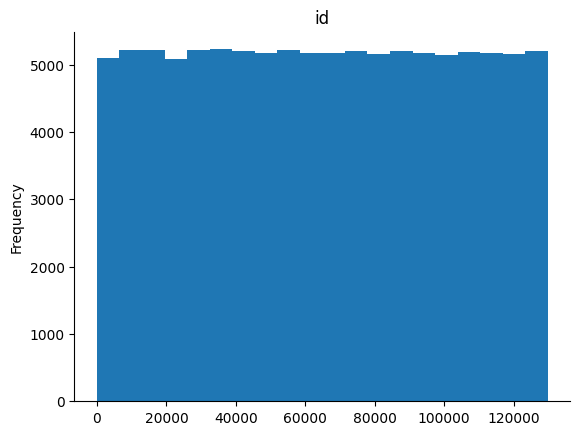

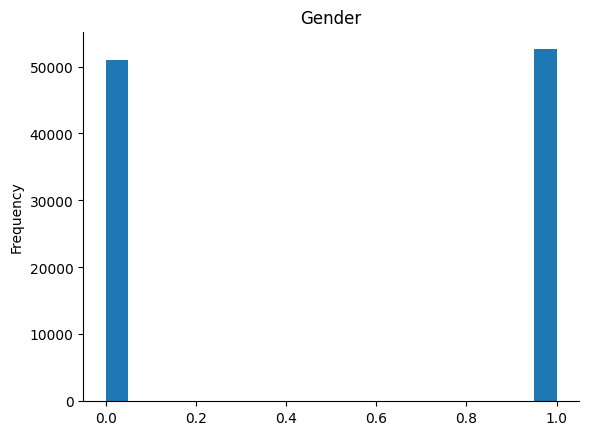

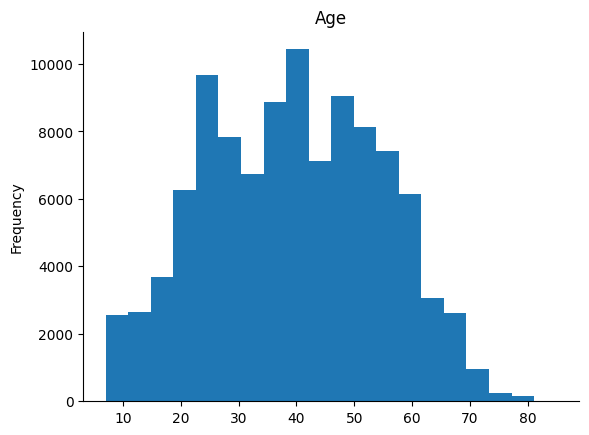

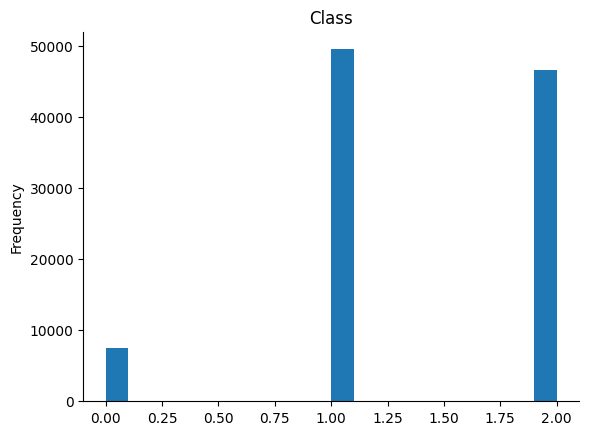

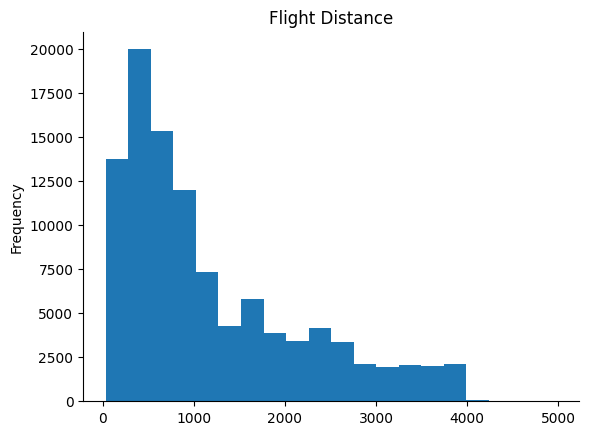

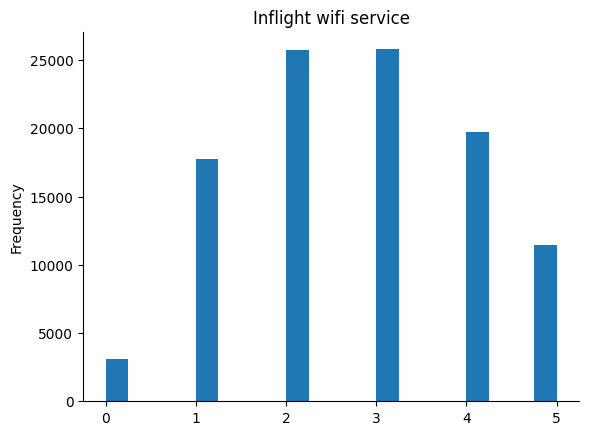

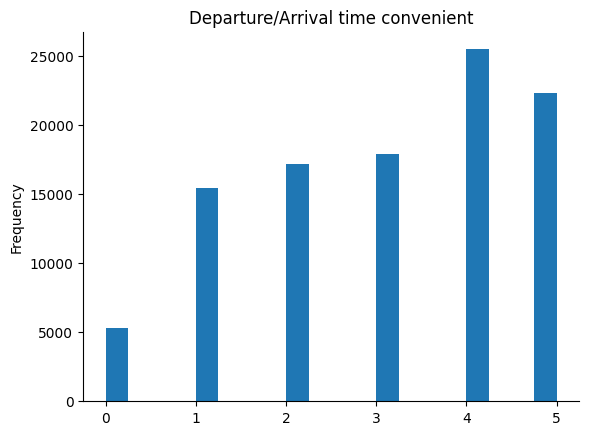

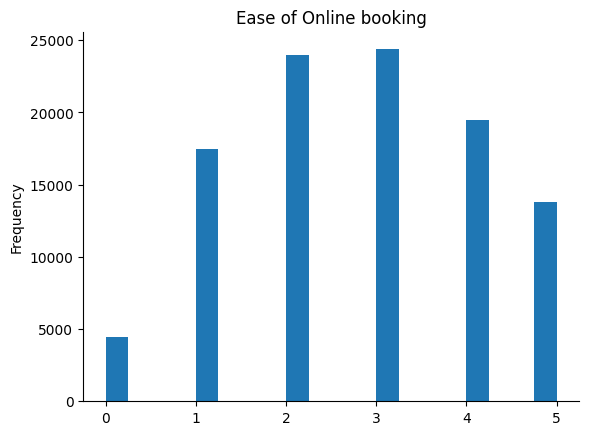

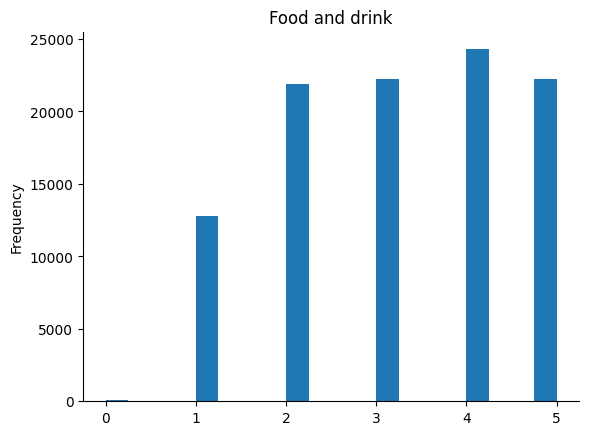

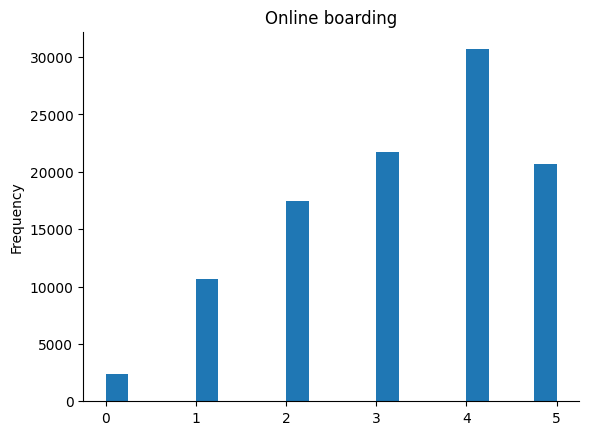

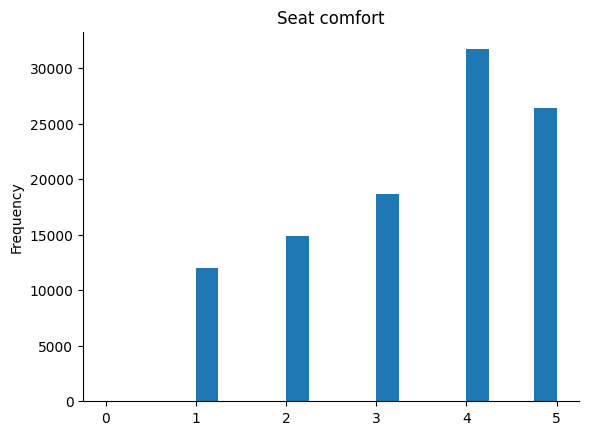

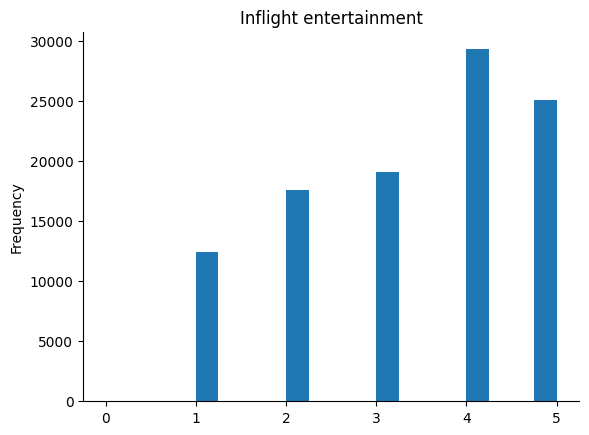

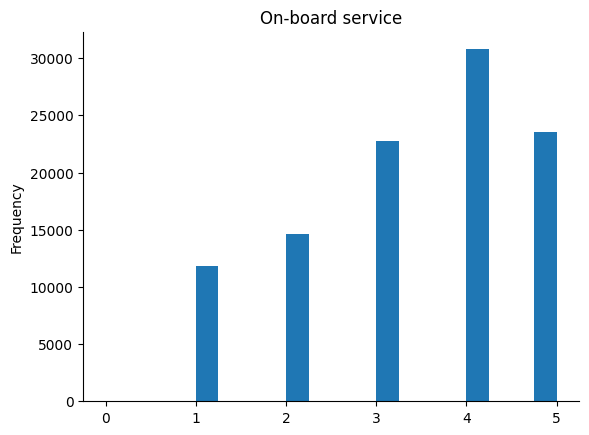

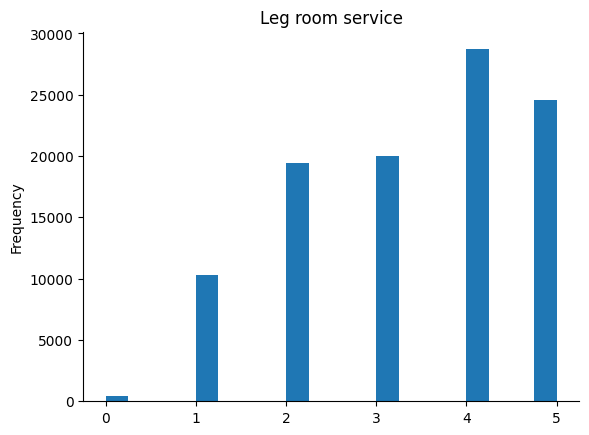

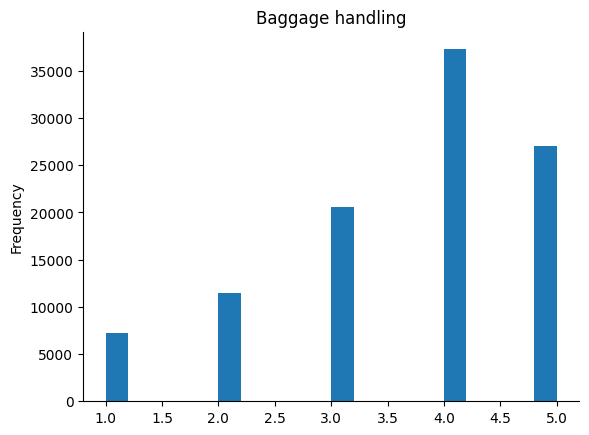

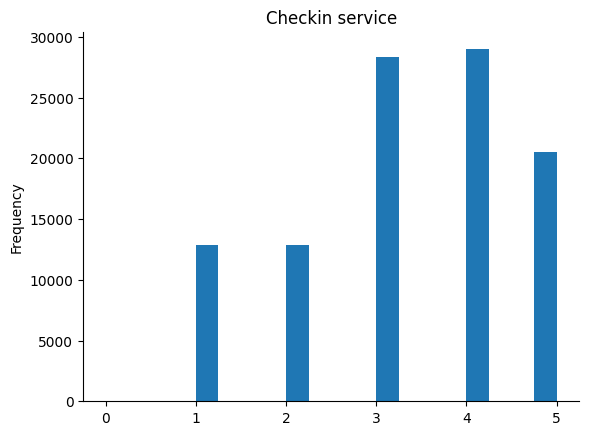

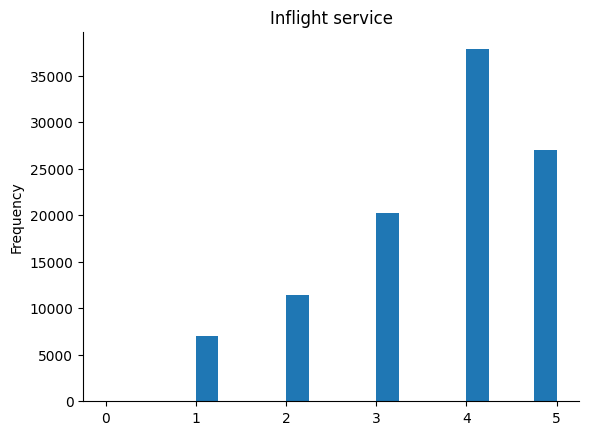

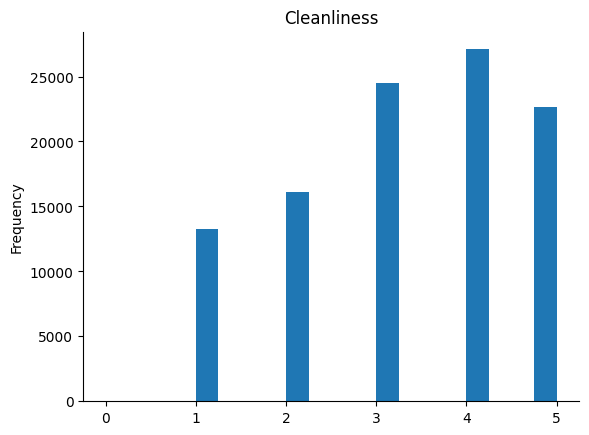

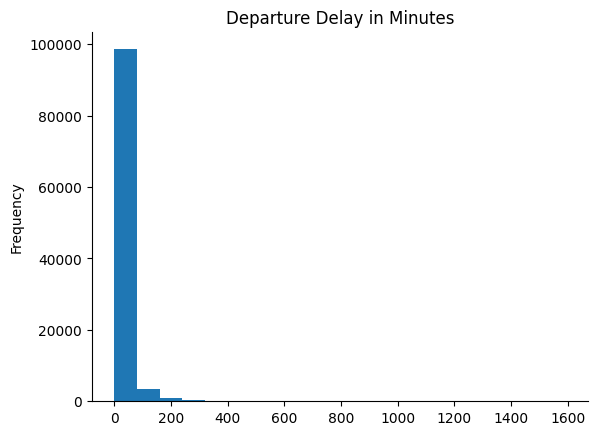

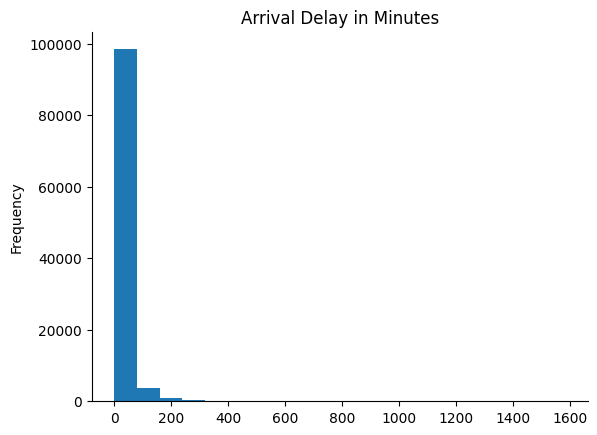

In [13]:
# Loop through each column in the preprocessed dataset
for column in df_clean.columns:
    # Skip the 'satisfaction' column as it is the target variable
    if column != 'satisfaction':
        # Plot histogram for each attribute
        df_clean[column].plot(kind='hist', bins=20, title=column)
        plt.gca().spines[['top', 'right']].set_visible(False)
        plt.show()

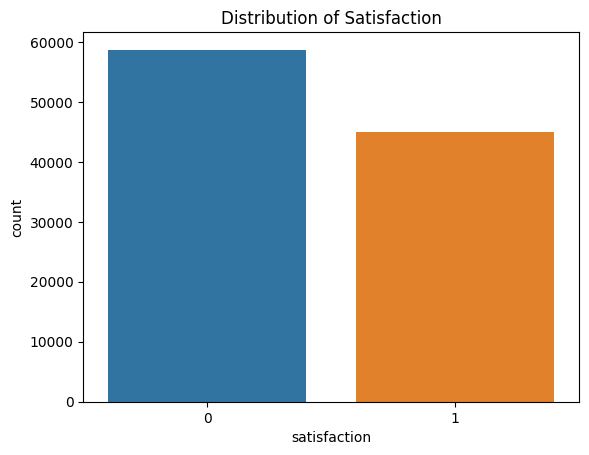

In [14]:
# Visualize the distribution of the target variable
sns.countplot(x='satisfaction', data=df_clean)
plt.title('Distribution of Satisfaction')
plt.show()

In [15]:
# Separate features and target variable
X = df_clean.drop("satisfaction", axis=1)
y = df_clean["satisfaction"]

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Random Forest Classifier for feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Get feature importances
feature_importances = rf_model.feature_importances_

In [20]:
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [21]:
# Display the top N important features
top_n = 10  # Change N to the desired number of top features
top_features = feature_importance_df.head(top_n)
print("Top", top_n, "important features:")
print(top_features)

Top 10 important features:
                   Feature  Importance
9          Online boarding    0.187484
5    Inflight wifi service    0.161458
3                    Class    0.111241
11  Inflight entertainment    0.072822
4          Flight Distance    0.051621
13        Leg room service    0.049785
10            Seat comfort    0.043680
7   Ease of Online booking    0.042500
2                      Age    0.038440
0                       id    0.038201


In [22]:
# Ensemble Learning Models

# Random Forest
rf_pred = rf_model.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.95255562527149


In [23]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_pred = gb_model.predict(X_test_scaled)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))

Gradient Boosting Accuracy: 0.9270235049954149


In [24]:
# Feedforward Neural Network (FNN)

fnn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
fnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
fnn_history = fnn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_split=0.2)

fnn_accuracy = fnn_model.evaluate(X_test_scaled, y_test)[1]
print("Feedforward Neural Network Accuracy:", fnn_accuracy)

Epoch 1/100
1036/1036 [==============================] - 4s 3ms/step - loss: 0.3694 - accuracy: 0.8485 - val_loss: 0.2503 - val_accuracy: 0.8983
Epoch 2/100
1036/1036 [==============================] - 4s 4ms/step - loss: 0.2753 - accuracy: 0.8855 - val_loss: 0.2088 - val_accuracy: 0.9149
Epoch 3/100
1036/1036 [==============================] - 3s 3ms/step - loss: 0.2418 - accuracy: 0.9001 - val_loss: 0.1866 - val_accuracy: 0.9270
Epoch 4/100
1036/1036 [==============================] - 3s 3ms/step - loss: 0.2206 - accuracy: 0.9085 - val_loss: 0.1728 - val_accuracy: 0.9290
Epoch 5/100
1036/1036 [==============================] - 3s 3ms/step - loss: 0.2080 - accuracy: 0.9149 - val_loss: 0.1652 - val_accuracy: 0.9331
Epoch 6/100
1036/1036 [==============================] - 4s 4ms/step - loss: 0.2017 - accuracy: 0.9177 - val_loss: 0.1695 - val_accuracy: 0.9310
Epoch 7/100
1036/1036 [==============================] - 3s 3ms/step - loss: 0.1968 - accuracy: 0.9187 - val_loss: 0.1630 - val_ac

In [25]:
fnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3969 (15.50 KB)
Trainable params: 3969 (15.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: >

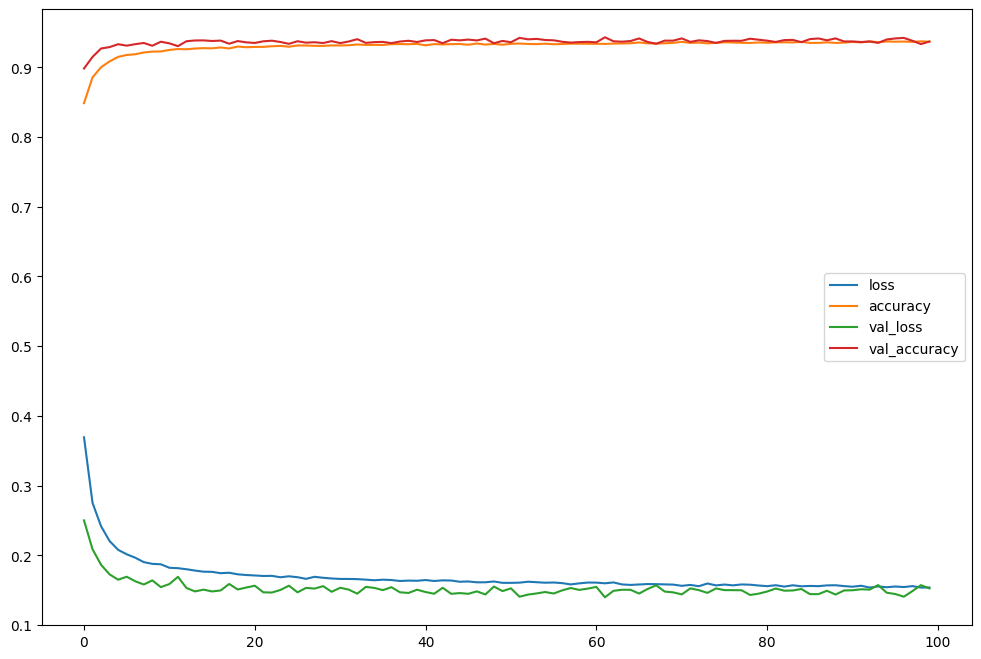

In [26]:
loss_df = pd.DataFrame(fnn_history.history)
# print(loss_df)
loss_df.plot(figsize=(12, 8))

In [27]:
# Recurrent Neural Network (RNN)

le = LabelEncoder()
X_train['Age'] = le.fit_transform(X_train['Age'])
X_test['Age'] = le.transform(X_test['Age'])

X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

rnn_model = Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=100, batch_size=64, validation_split=0.2)

rnn_accuracy = rnn_model.evaluate(X_test_rnn, y_test)[1]
print("Recurrent Neural Network Accuracy:", rnn_accuracy)

Epoch 1/100
1036/1036 [==============================] - 8s 5ms/step - loss: 0.3450 - accuracy: 0.8582 - val_loss: 0.2332 - val_accuracy: 0.9020
Epoch 2/100
1036/1036 [==============================] - 6s 5ms/step - loss: 0.2539 - accuracy: 0.8954 - val_loss: 0.2115 - val_accuracy: 0.9106
Epoch 3/100
1036/1036 [==============================] - 4s 4ms/step - loss: 0.2229 - accuracy: 0.9074 - val_loss: 0.1926 - val_accuracy: 0.9220
Epoch 4/100
1036/1036 [==============================] - 4s 4ms/step - loss: 0.2083 - accuracy: 0.9144 - val_loss: 0.1793 - val_accuracy: 0.9275
Epoch 5/100
1036/1036 [==============================] - 6s 6ms/step - loss: 0.1976 - accuracy: 0.9181 - val_loss: 0.1937 - val_accuracy: 0.9193
Epoch 6/100
1036/1036 [==============================] - 4s 4ms/step - loss: 0.1920 - accuracy: 0.9201 - val_loss: 0.1733 - val_accuracy: 0.9269
Epoch 7/100
1036/1036 [==============================] - 4s 4ms/step - loss: 0.1878 - accuracy: 0.9215 - val_loss: 0.1800 - val_ac

In [28]:
rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                14200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                1632      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16377 (63.97 KB)
Trainable params: 16377 (63.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: >

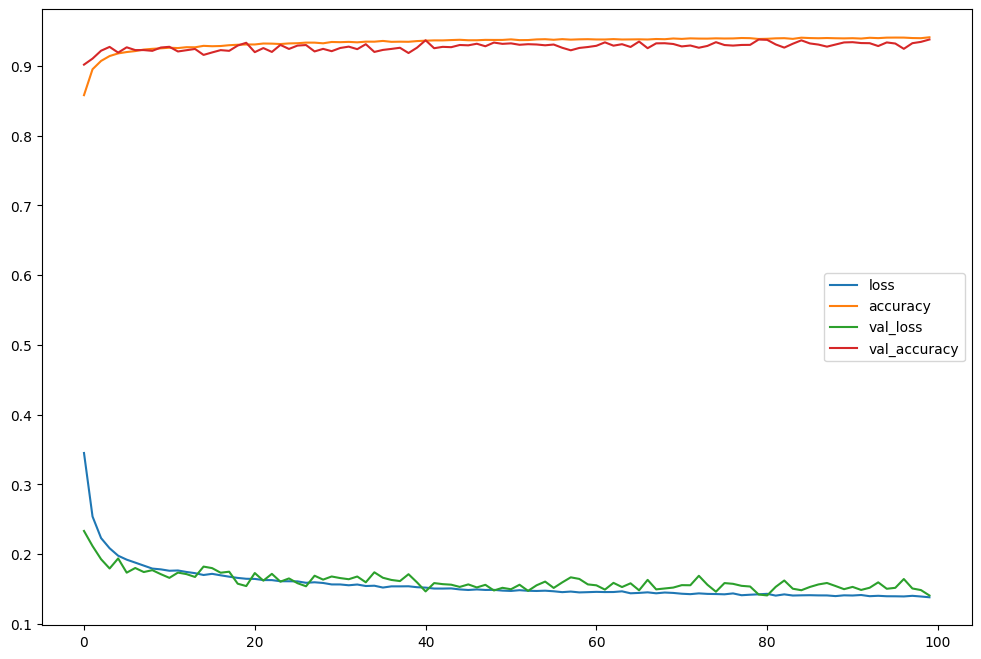

In [29]:
loss_df = pd.DataFrame(rnn_history.history)
# print(loss_df)
loss_df.plot(figsize=(12, 8))

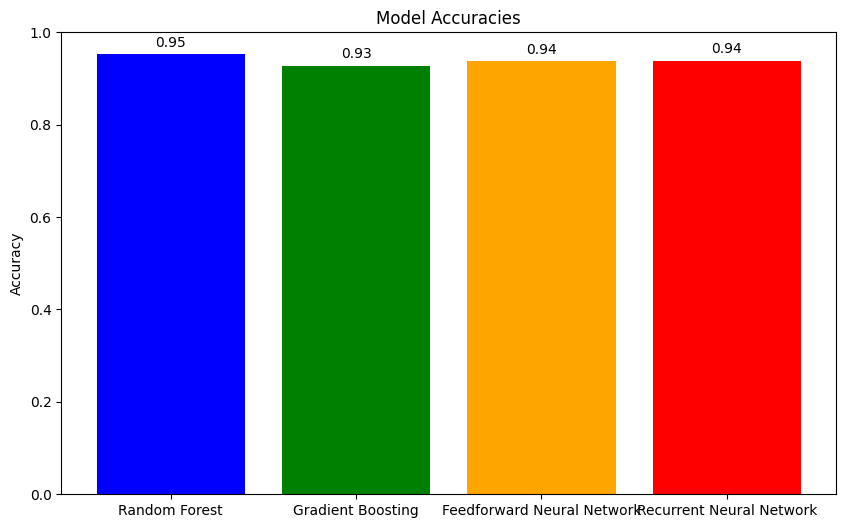

In [31]:
# List of model names
models = ['Random Forest', 'Gradient Boosting', 'Feedforward Neural Network', 'Recurrent Neural Network']

# List of accuracies corresponding to each model
accuracies = [accuracy_score(y_test, rf_pred),
              accuracy_score(y_test, gb_pred),
              fnn_accuracy,
              rnn_accuracy]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.ylim([0, 1])  # Set y-axis limit to be between 0 and 1 for accuracy
plt.title('Model Accuracies')
plt.ylabel('Accuracy')

# Adding values on top of the bars
for bar, accuracy in zip(bars, accuracies):
    yval = accuracy + 0.01  # Adjust the vertical position of the text
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(accuracy, 2), ha='center', va='bottom')

plt.show()